In [75]:
from sys import path
if '..' not in path:
    path.insert(0, '..')

In [76]:
import _library.som_utils as utils
import _library.som_pre_utils as pre_utils
import _library.fault_utils as fault_utils
import numpy as np
import pandas as pd
import pickle
import csv 
from _library.utils import SYSTEM_NAMES, SUBFOLDERS, load_datasets
from os import path, makedirs
from sklearn.preprocessing import StandardScaler
from IPython.display import Javascript
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [77]:
%cd /mnt/data/vieri/projects/SAMPLE/

/mnt/data/vieri/projects/SAMPLE


# Read the cardio dataset

In [78]:
system_name = "Cardio_test"
system_path = path.join("data", system_name)

In [79]:
file_path = path.join(system_path, "cardio.mat")

# Read the mat file (binary data exported from MATHLAB)
mat_file = loadmat(file_path, matlab_compatible = False)

features = mat_file['X']
classes = mat_file['y']
print("OBSERVATIONS:", len(classes))
print(f"--> FEATURES ({len(features[0])})")
unique_classes = np.unique(classes)
print(f"--> CLASSES ({len(unique_classes)}):", ', '.join([str(int(value)) for value in np.unique(classes)]))

# Convert it to a pandas dataframe
features_data = pd.DataFrame(features, columns = [f'X{j+1}' for j in range(len(features[0]))])
classes_data =  pd.DataFrame(classes, columns = ["Y"], dtype = np.int16)
cardio_data = classes_data.join(features_data)
display(cardio_data)

# Add a "fake" time series
cardio_data.index = pd.date_range(start = '2022-01-01', periods = len(cardio_data), freq = "1H")                        
display(cardio_data)

OBSERVATIONS: 1831
--> FEATURES (21)
--> CLASSES (2): 0, 1


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
0,0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,...,1.485973,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294
1,0,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,...,1.485973,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294
2,0,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,...,1.141780,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018
3,0,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,...,1.141780,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018
4,0,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,...,-0.208514,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,1,-0.418356,-0.919988,-0.161178,0.829564,0.953023,-0.061401,3.060819,1.221178,1.338133,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.982928,-2.616202,-1.561651,0.244620,-0.493294
1827,1,-0.418356,-0.919988,-0.171055,0.796630,0.823510,-0.061401,3.565299,1.281003,1.453945,...,1.459497,-0.976561,1.524719,-0.065382,-0.488279,-1.862696,-2.807747,-1.699585,0.010817,-0.493294
1828,1,-0.418356,-0.919988,-0.164635,0.952396,1.120470,-0.061401,2.788995,1.221178,1.222321,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.922812,-2.488506,-1.492683,0.244620,-0.493294
1829,1,-0.418356,-0.919988,-0.150934,0.695726,1.212428,-0.061401,2.484822,1.221178,1.222321,...,1.459497,-0.976561,1.524719,0.278625,-0.488279,-1.321656,-2.296962,-1.423716,0.144419,-0.493294


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
2022-01-01 00:00:00,0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,...,1.485973,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294
2022-01-01 01:00:00,0,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,...,1.485973,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294
2022-01-01 02:00:00,0,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,...,1.141780,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018
2022-01-01 03:00:00,0,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,...,1.141780,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018
2022-01-01 04:00:00,0,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,...,-0.208514,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18 02:00:00,1,-0.418356,-0.919988,-0.161178,0.829564,0.953023,-0.061401,3.060819,1.221178,1.338133,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.982928,-2.616202,-1.561651,0.244620,-0.493294
2022-03-18 03:00:00,1,-0.418356,-0.919988,-0.171055,0.796630,0.823510,-0.061401,3.565299,1.281003,1.453945,...,1.459497,-0.976561,1.524719,-0.065382,-0.488279,-1.862696,-2.807747,-1.699585,0.010817,-0.493294
2022-03-18 04:00:00,1,-0.418356,-0.919988,-0.164635,0.952396,1.120470,-0.061401,2.788995,1.221178,1.222321,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.922812,-2.488506,-1.492683,0.244620,-0.493294
2022-03-18 05:00:00,1,-0.418356,-0.919988,-0.150934,0.695726,1.212428,-0.061401,2.484822,1.221178,1.222321,...,1.459497,-0.976561,1.524719,0.278625,-0.488279,-1.321656,-2.296962,-1.423716,0.144419,-0.493294


# Train and test split

In [80]:
df = cardio_data
inliers = df[df['Y'] == 0]
outliers = df[df['Y'] == 1]

mapped_classes = {0: 'Inlier', 1: 'Outlier'}
extract_class = lambda class_num: 'Outlier' if class_num == 1 else 'Inlier'

print(f"CLASS  'inliers (0)': {len(inliers)} obs. ({(round((len(inliers)/len(df))*100, 1))} %)")
print(f"CLASS 'outliers (1)':  {len(outliers)} obs.  ({(round((len(outliers)/len(df))*100, 1))} %)")

CLASS  'inliers (0)': 1655 obs. (90.4 %)
CLASS 'outliers (1)':  176 obs.  (9.6 %)


In [81]:
# Compute the indexes
#random_inliers_obs = inliers.sample(frac = 0.20, random_state = 99)
#idk_test = random_inliers_obs.index.tolist() + outliers.index.tolist()
#idk_train = sorted(list(set(df.index.tolist()) - set(idk_test)))
cutting_idk = 507
idk_train = df.index[:-cutting_idk]
idk_test = df.index[-cutting_idk:]

# Create the two subsets
train_data = df.loc[idk_train,:]
test_data =  df.loc[idk_test,:]

# Compute the classes within them
train_classes_counter = train_data.groupby(by = 'Y').count()['X1'].to_dict()
test_classes_counter = test_data.groupby(by = 'Y').count()['X1'].to_dict()

# Select only the features 
train_classes = train_data['Y']
train_data = train_data.drop(columns = "Y")

test_classes = test_data['Y']
test_data = test_data.drop(columns = "Y")

# Visualize their dimensions
print("-" * 25 + f"\nTOTAL: {len(df)} obs.\n" + "-" * 25 + "\n")
print( "-" * 40 + f"\na) TRAIN SUBSET: {len(train_data)} obs. ({(round((len(train_data)/len(df))*100, 1))} %)\n"  + "-" * 40)
print("\t-->", '\n'.join([f'CLASS {class_name} ({extract_class(class_name)}): {counter} obs. ({(round((counter/len(train_data))*100, 1))} %)'
                           for class_name, counter in train_classes_counter.items()]))
print("\n" + "-" * 40 + f"\nb) TEST SUBTEST:  {len(test_data)} obs. ({(round((len(test_data)/len(df))*100, 1))} %)\n"  + "-" * 40)
print("\t-->", '\n\t--> '.join([f'CLASS {class_name} ({extract_class(class_name)}): {counter} obs. ({(round((counter/len(test_data))*100, 1))} %)'
                           for class_name, counter in test_classes_counter.items()]))

-------------------------
TOTAL: 1831 obs.
-------------------------

----------------------------------------
a) TRAIN SUBSET: 1324 obs. (72.3 %)
----------------------------------------
	--> CLASS 0 (Inlier): 1324 obs. (100.0 %)

----------------------------------------
b) TEST SUBTEST:  507 obs. (27.7 %)
----------------------------------------
	--> CLASS 0 (Inlier): 331 obs. (65.3 %)
	--> CLASS 1 (Outlier): 176 obs. (34.7 %)


# Data pre-processing
**SOURCE**: *'Fault Prediction and Early-Detection in Large PV Power Plants
Based on Self-Organizing Maps'* by Alessandro Betti et al. (2021).
- Compute a missing feature (i.e., DC Power)
- *Data Pre-Processing* (Section 2.3)
- *Data Detrending* (Section 2.5)
- Data Scaling* (Section 2.5)

In [8]:
pre_processing_steps = {
    "Three-phase average": False,
    "Above Solar Irradiance Minimum": False,
    "Linear regression for AC power outliers": False,
    "Linear regression for AC power outliers (Test set)": False,
    "Data detrending": False,
    "Data standardization": True
}
print("\n".join(["PRE-PROCESSING STEP SELECTED: " + str(step) 
                     for step, flag in pre_processing_steps.items() if flag == True]))

PRE-PROCESSING STEP SELECTED: Data standardization


## F) Data Standardization

In [9]:
if pre_processing_steps["Data standardization"]:

    # StandardScaler
    scaler = StandardScaler().fit(train_data)

    # Transform the TRAIN data
    train_data = pd.DataFrame(data = scaler.transform(train_data),
                                        index = train_data.index, 
                                        columns = train_data.columns)
    print("(TRAIN) has been standardized.")

    # Transform the TEST data
    test_data = pd.DataFrame(data = scaler.transform(test_data),
                                       index = test_data.index, 
                                       columns = test_data.columns)
    print(" (TEST) has been standardized (using a fitted StandardScaler).\n")
else:
    print("This pre-processing step (Data standardization) has not been selected.")

(TRAIN) has been standardized.
 (TEST) has been standardized (using a fitted StandardScaler).



## End of the pre-processing steps 
### Example of the train dataset

In [10]:
print("-" * 20 + " INV 1: TRAIN " + "-" * 20 )
train_data.info()
print("\n" + "-" * 20 + " INV 1: TEST " + "-" * 20 )
test_data.info()

-------------------- INV 1: TRAIN --------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1324 entries, 2022-01-01 00:00:00 to 2022-02-25 03:00:00
Freq: H
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1324 non-null   float64
 1   X2      1324 non-null   float64
 2   X3      1324 non-null   float64
 3   X4      1324 non-null   float64
 4   X5      1324 non-null   float64
 5   X6      1324 non-null   float64
 6   X7      1324 non-null   float64
 7   X8      1324 non-null   float64
 8   X9      1324 non-null   float64
 9   X10     1324 non-null   float64
 10  X11     1324 non-null   float64
 11  X12     1324 non-null   float64
 12  X13     1324 non-null   float64
 13  X14     1324 non-null   float64
 14  X15     1324 non-null   float64
 15  X16     1324 non-null   float64
 16  X17     1324 non-null   float64
 17  X18     1324 non-null   float64
 18  X19     1324 non-null   float64
 19  X20     1324

# Self-organizing map (SOM)

In [11]:
train_data = {'INV1': train_data}
test_data = {'INV1': test_data}

In [12]:
grid_search = False

## Pre trained 

In [13]:
pre_trained = False

In [14]:
pre_steps = "_1hour_averaged_fullReg_detrended" 
if system_name == "Soleto 1":
    trained_version = {
        "INV1": "20grid_3Kepoch_0.001lr_10sigma_gaussianFunc" + pre_steps,
        "INV2": "14grid_10Kepoch_0.001lr_9sigma_gaussianFunc" + pre_steps,
        "INV3": "12grid_3Kepoch_0.001lr_7sigma_gaussianFunc" + pre_steps,
        "INV4": "22grid_2Kepoch_0.01lr_8sigma_gaussianFunc" + pre_steps
    }
elif system_name == "Cardio_test":
      trained_version = {
        "INV1": "20grid_3Kepoch_0.001lr_10sigma_gaussianFunc" + pre_steps,
    }

In [15]:
display(trained_version) if pre_trained else print(f"PRE TRAINED SOM: {pre_trained}")

PRE TRAINED SOM: False


### BEST AVERAGED SOMs
- **Soleto 1**: *18grid_4Kepoch_0.001lr_9sigma_gaussianFunc*
    - (INV1:TOP2) --> *18grid_4Kepoch_0.001lr_8sigma_gaussianFunc*
- **Soleto 2**: *16grid_4Kepoch_0.001lr_10sigma_gaussianFunc* 
- **Galatina**: *26grid_10Kepoch_0.01lr_10sigma_gaussianFunc*
- **All PV Systems**: *16grid_5Kepoch_0.001lr_9sigma_gaussianFunc*

## Create a saving folder

In [16]:
# -------- MAIN FOLDER ----------------
saving_folder_name = "SOMs"
# -------- SUB FOLDERS ----------------
saving_graph_folder_name = "Graphs"
saving_som_folder_name = "Trained SOM"
saving_kpi_folder_name = "KPI scores"
saving_warnings_folder_name = "Warnings"
saving_metrics_folder_name = "Metrics"
saving_params_folder_name = "Params"

In [17]:
# Main saving folder
saving_folder_path = path.join(system_path, "..", "..", saving_folder_name)

# Create the saving folder
if not path.exists(saving_folder_path):
    makedirs(saving_folder_path) 
    print(f"PV System --> {system_name.upper()}\nA new saving folder has been created: {saving_folder_path}\n")

# Create the subfolders
subfolders = [saving_graph_folder_name, saving_som_folder_name, saving_kpi_folder_name, saving_warnings_folder_name, 
              saving_metrics_folder_name]

for subfolder in subfolders + [saving_params_folder_name]:
    subfolder_path = path.join(saving_folder_path, subfolder)
    if not path.exists(subfolder_path):
        makedirs(subfolder_path)
        print(f"{system_name} --> Folder '{subfolder}' has been created!")

## Hyperparameters

In [18]:
map_topology = 'hexagonal'
activation_distance = 'euclidean'

In [61]:
som_config = {
    "INV1": {
        "dim_grid": 4,
        "epoch": 4 * (10**3),
        "learning_rate": 0.001,
        "sigma": 1,
        "neighborhood_function": "gaussian"  
    }
}

## Training phase

In [62]:
train_data_shuffling = True
merge_inv_data = False

In [63]:
inv_names = ['INV1']
dataset_name = 'all data' 

trained_som = dict()
som_version = dict()

for inv_name in inv_names:
    
    # ----------------------------------------
    # LOADED SPECIFIC PRETRAINED VERSION
    tmp_inv_number = 1
    tmp_inv_name = 'INV'+ str(tmp_inv_number)
    # ----------------------------------------

    # Saving path
    file_name = f"trained_som_{tmp_inv_name}.p"
    loading_path = path.join(saving_folder_path, saving_som_folder_name, trained_version[tmp_inv_name], file_name)

    # CASE 1: Load the trained SOM 
    if pre_trained & path.exists(loading_path):      
        with open(loading_path, 'rb') as infile:
            som = pickle.load(infile)
            print(40 * "-", f"\nThe trained SOM has been LOADED!\nVersion [{tmp_inv_name}]: "\
                  f"{trained_version[tmp_inv_name]}\n" + 40 * "-")

        # CREATE THE POTENTIAL MSSING SUBFOLDERS for this SOM configuration
        pretrained_config_params = trained_version[tmp_inv_name]
        pretrained_config_params += "_trainedInv" + str(tmp_inv_number) + "Data"
        trained_som_version = utils.create_somVersion_folders(saving_folder_path, subfolders, dataset_name, 
                                                              pretrained_config_params, merge_inv_data, 
                                                              pre_processing_steps)
    else:
        # CASE 2: Train a SOM

        # 0) Merging the inveretr data in case the flag has been set to true
        if merge_inv_data:
            all_data = [train_data[inv_name] for inv_name in inv_names]
            input_data = pd.concat(all_data).sort_index()
            print(f"The inverter data ({len(inv_names)}) has been merged ({len(input_data)} obs.)")
        else: 
            input_data = train_data[inv_name]

        # 0) Create a matrix for the training data
        print("\n" + 50 * "-" + "\nCreating a data matrix for the training data...\n" + 50 * "-")
        train_matrix, train_cols, train_timestamps = utils.to_num_matrix(input_data)

        # CASE 2.1: Carry out a GRID SEARCH function to find out the optimal hyperparameters
        if grid_search:
            neighborhood_functions = ["gaussian"]

            # Grid of values (1540 configs: 14 epoches * 11 grid dims * 10 sigma values)
            epoch_values = list(range(1000, 10000, 1000)) + list(range(10000, 60000, 10000)) 
            dim_grid_values = np.arange(10, 32, step = 2)
            sigma_values = np.arange(1, 11, step = 1, dtype = np.int32)
            learning_rate_values = [0.01, 0.001]

            # 2.1.0) Create a base saving folder 
            path_folder = path.join(saving_folder_path, saving_som_folder_name)

            # 2.1.1) TEST DATA: Create a numerical matrix  for the test data
            print("\n" + 50 * "-" + "\nCreating a data matrix for the test data...\n" + 50 * "-")
            test_matrix, test_cols, test_timestamps = utils.to_num_matrix(test_data[inv_name])

            # Create a compact version of the parameters
            params = [epoch_values, dim_grid_values, learning_rate_values, sigma_values, neighborhood_functions]
            try:
                inv_test_obs_to_ignore = test_obs_to_ignore[inv_name] 
            except KeyError:
                inv_test_obs_to_ignore = None 

            # Create the string to save the configuration of the grid search (VAR: dataset type, regression on the test set)
            config_type = dataset_name.replace("-", "").replace(" ", "_")[:-9]
            if pre_processing_steps["Linear regression for AC power outliers"]:
                if pre_processing_steps["Linear regression for AC power outliers (Test set)"]:
                    config_type += "_" + "fullReg"
                else:
                    config_type += "_" + "reg"
            if pre_processing_steps["Data detrending"]:
                config_type += "_" + "detrended"

            # 2.1.2) Start the Grid search to find the optimal parameters
            best_som, best_config = utils.grid_search(inv_name, train_matrix, train_timestamps, test_matrix, 
                                                      test_timestamps, inv_test_obs_to_ignore, params,
                                                      map_topology, activation_distance, path_folder, fault_df, config_type,
                                                      shuffling_flag = train_data_shuffling, 
                                                      verbose = True)
            trained_som_version = best_config
            som = best_som
        else:
            # CASE 2.2: Train the SOM with the "static" hyperparameters
            params = som_config[inv_name]
            som,  quantization_error, weights = utils.train_som(train_matrix, params["dim_grid"], params["epoch"], 
                                                                params["learning_rate"], params["sigma"], 
                                                                map_topology, params["neighborhood_function"], 
                                                                activation_distance, 
                                                                shuffling_flag = train_data_shuffling, 
                                                                verbose = False)

            # CREATE THE SUBFOLDERS for this SOM configuration
            #pre_processing_steps["extra_param"] = "run5_shuffling_noSeed"
            trained_som_version = utils.create_somVersion_folders(saving_folder_path, subfolders, dataset_name, params,
                                                                  merge_inv_data, pre_processing_steps)

        # CASE 2.2.A) Save the pretrained SOM as a file
        if merge_inv_data:
            file_name = f"trained_som_mergedInvData.p"
        else:
            file_name = f"trained_som_{inv_name}.p"
        saving_path = path.join(saving_folder_path, saving_som_folder_name, trained_som_version, file_name)
        with open(saving_path, 'wb') as outfile:
            pickle.dump(som, outfile)
            print("\n"+ 120*"-" + f"\n\tThe trained SOM has been SAVED as '{trained_som_version}'.\n" + 120*"-")

        # CASE 2.2.B) Save also the second best SOM [ONLY FOR GRID SEARCH]
        #if grid_search and (second_best_config is not None):
            #saving_path = path.join(saving_folder_path, saving_som_folder_name, second_best_config, file_name)
            #with open(saving_path, 'wb') as outfile:
                # pickle.dump(second_best_som, outfile)
                # print("\n"+ 100*"-" + f"\n\t\t\tThe second best trained SOM has been SAVED as "\
                      #f"'{second_best_config}'.\n" + 100*"-")

    # Save the trained SOM for each inverter
    trained_som[inv_name] = som
    som_version[inv_name] = trained_som_version


--------------------------------------------------
Creating a data matrix for the training data...
--------------------------------------------------

--> INPUT MATRIX: (1324, 21)

--> FEATURES (21)
	X1
	X2
	X3
	X4
	X5
	X6
	X7
	X8
	X9
	X10
	X11
	X12
	X13
	X14
	X15
	X16
	X17
	X18
	X19
	X20
	X21
--------------------------------------------------
	PARAMETERS: Self-Organizing Map (SOM)
--------------------------------------------------
(SOM) GRID SIZE: 4x4
(SOM) EPOCH: 4000 (with shuffling)
(SOM) LR: 0.001
(SOM) SIGMA: 1
(SOM) MAP TOPOLOGY: 'hexagonal'
(SOM) NEIGHBOURHOOD FUNCTION: 'gaussian'
(SOM) ACTIVATION DISTANCE: 'euclidean'

---------- Training the SOM ---------- 

 [ 4000 / 4000 ] 100% - 0:00:00 left 
 quantization error: 3.7741326078103983

 SOM VERSION:  4grid_4Kepoch_0.001lr_1sigma_gaussianFunc_ 

 The folder 'Graphs/4grid_4Kepoch_0.001lr_1sigma_gaussianFunc_' has been created!
 The folder 'Trained SOM/4grid_4Kepoch_0.001lr_1sigma_gaussianFunc_' has been created!
 The folder 'K

## Computing the KPI scores

## Select period of the sliding window [hours]
'None' for computing a *daily KPI*

In [64]:
sliding_window = 1

## Computing the KPI scores

In [65]:
load_kpi_scores = False #pre_trained

---------------------------------------- INV1 ----------------------------------------

--------------------------------------------------
Creating a data matrix for the training data...
--------------------------------------------------

--> INPUT MATRIX: (1324, 21)

--> FEATURES (21)
	X1
	X2
	X3
	X4
	X5
	X6
	X7
	X8
	X9
	X10
	X11
	X12
	X13
	X14
	X15
	X16
	X17
	X18
	X19
	X20
	X21

--------------------------------------------------
Creating a data matrix for the test data...
--------------------------------------------------

--> INPUT MATRIX: (507, 21)

--> FEATURES (21)
	X1
	X2
	X3
	X4
	X5
	X6
	X7
	X8
	X9
	X10
	X11
	X12
	X13
	X14
	X15
	X16
	X17
	X18
	X19
	X20
	X21
--------------------------------------------------------------------------------
				Mapping outcomes (TRAIN DATA)
--------------------------------------------------------------------------------
OBSERVATIONS: 1324 (1 K)
MAP NEURONS (16/16): 
--------------------------------------------------------------------------------
		

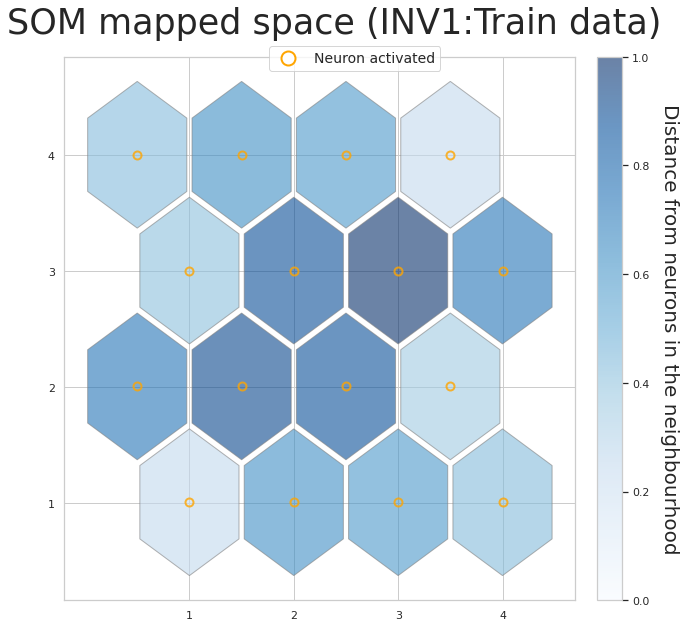

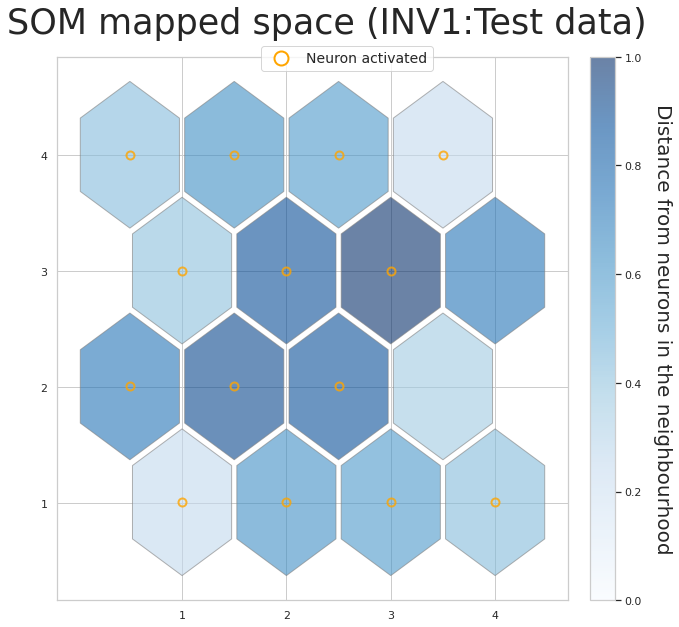


--------------------------------------------------------------------------------
			Computing the train KPI for creating the thresholds. 
--------------------------------------------------------------------------------
----------------------------------------------------------------------
A) Computing the cell probabilities [P(i,TRAIN)] for all the train data.
----------------------------------------------------------------------

				DONE

----------------------------------------------------------------------
B) [EXPERIMENTAL] Computing the cell probabilities for the observations [P(i,d)].
SLIDING WINDOW: 1 hours
----------------------------------------------------------------------

Computing the cell probabilities for 1324 observations...
Minimum daily observation: 1  (i.e., that occurrs at least in the 5% of the dataset)

KPI COMPUTED: 1324/1324 (100.0 %)

END Computing probs: -->  0:00:00.609100
--------------------------------------------------------------------------------
C) C

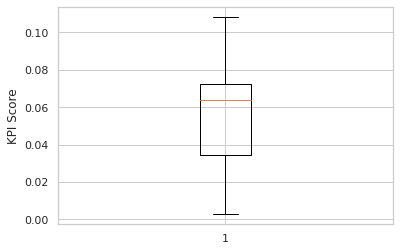

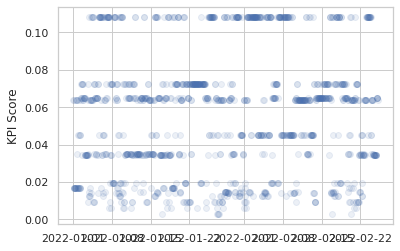


--------------------------------------------------------------------------------
			Computing KPI thresholds. 
--------------------------------------------------------------------------------
MEAN (μ):  0.058
STAND. DEV. (σ):  0.0321

THRESHOLD 1 (μ - 0.2σ):  0.0516
THRESHOLD 2 (μ - 0.9σ):  0.0291

--------------------------------------------------------------------------------
				Computing the Test KPI
--------------------------------------------------------------------------------
----------------------------------------------------------------------
A) Computing the cell probabilities [P(i,TRAIN)] for all the train data.
----------------------------------------------------------------------

				DONE

----------------------------------------------------------------------
B) [EXPERIMENTAL] Computing the cell probabilities for the observations [P(i,d)].
SLIDING WINDOW: 1 hours
----------------------------------------------------------------------

Computing the cell probabilities fo

,KPI score
2022-02-25 04:00:00,0.034375
2022-02-25 05:00:00,0.065165
2022-02-25 06:00:00,0.065165
2022-02-25 07:00:00,0.065165
2022-02-25 08:00:00,0.034375
...,...
2022-03-18 02:00:00,0.044988
2022-03-18 03:00:00,0.044988
2022-03-18 04:00:00,0.044988
2022-03-18 05:00:00,0.044988


--------------------------------------------------
		    THERSHOLDS
--------------------------------------------------


{'INV1': [0.05162001089106362, 0.02914983744676595]}

In [66]:
kpi_scores_inv = dict()
thresholds_inv = dict()
for inv_name in inv_names:
    print(40 * "-", inv_name, 40 * "-")
    
    # Load the trained SOM for this inverter
    som = trained_som[inv_name]
    
    train_df = train_data[inv_name]
    test_df = test_data[inv_name]
    
    # Saving paths
    kpi_file_name = f"KPI_scores_{inv_name}.csv"
    threshold_file_name = f"thresholds_{inv_name}.csv"
    loading_kpi_path = path.join(saving_folder_path, saving_kpi_folder_name, trained_version[inv_name], kpi_file_name)
    loading_threshold_path = path.join(saving_folder_path, saving_kpi_folder_name, trained_version[inv_name], 
                                       threshold_file_name)
    
    # Load the KPI scores in the case they have already been computed previously
    if load_kpi_scores & path.exists(loading_kpi_path):
        print(50 * "-" + f"\nLoading the pre-computed KPI scores/thresholds..."\
              f"\nVersion: {trained_version[inv_name]}\n" + 50 * "-")
        
        # Load thresholds
        thresholds_df = pd.read_csv(loading_threshold_path)
        threshold1 = thresholds_df.iloc[0, 1]
        threshold2 = thresholds_df.iloc[1, 1]
        thresholds_inv[inv_name] = (threshold1, threshold2)
        print(f"FORMULA: {thresholds_df.iloc[0, 0]} --> THRESHOLD 1: {round(threshold1, 4)}")
        print(f"FORMULA: {thresholds_df.iloc[1, 0]} --> THRESHOLD 2: {round(threshold2, 4)}")

        # Load the kpi score
        kpi_scores_inv[inv_name] = pd.read_csv(loading_kpi_path, index_col=[0]) 
    else:
        # TRAIN DATA: Create a numerical matrix
        print("\n" + 50 * "-" + "\nCreating a data matrix for the training data...\n" + 50 * "-")
        train_matrix, train_cols, train_timestamps = utils.to_num_matrix(train_df)

        # TEST DATA: Create a numerical matrix 
        print("\n" + 50 * "-" + "\nCreating a data matrix for the test data...\n" + 50 * "-")
        test_matrix, test_cols, test_timestamps = utils.to_num_matrix(test_df)
    
        # Computing the KPI scores 
        std_multipliers = [0.2, 0.9]
        graphs_saving_folder = path.join(saving_folder_path, saving_graph_folder_name, som_version[inv_name]) 
        kpi_scores, thresholds, train_probs = utils.compute_kpi_scores(som, inv_name, train_matrix, train_timestamps, 
                                                                       test_matrix, test_timestamps, 
                                                                       std_multipliers, sliding_window, 
                                                                       graphs_saving_folder, visualize_graphs = True)
        thresholds_inv[inv_name] = thresholds
        kpi_scores_inv[inv_name] = kpi_scores
        
        # A) Save the thresholds as a CSV file
        saving_threhsold_path = path.join(saving_folder_path, saving_kpi_folder_name, som_version[inv_name], threshold_file_name)
        with open(saving_threhsold_path, 'w+', encoding="utf-8") as csv_file:
            write = csv.writer(csv_file)
            write.writerow(["Formula", "Threshold value"])
            write.writerows([
                    [f"(μ - {std_multipliers[0]}σ)", thresholds[0]],
                    [f"(μ - {std_multipliers[1]}σ)", thresholds[1]]
                ])
           
        # B) Save the KPI scores as a CSV file
        saving_kpi_path = path.join(saving_folder_path, saving_kpi_folder_name, som_version[inv_name], kpi_file_name)
        kpi_scores_inv[inv_name].to_csv(saving_kpi_path)
        
    # Visualize the KPI scores for this inverter
    display(kpi_scores_inv[inv_name])
    
# Visualize all the thresholds  
print(50 * "-" + "\n\t\t    THERSHOLDS\n" + 50 * "-")
display(thresholds_inv)

,KPI score
2022-02-25 04:00:00,0.034375
2022-02-25 05:00:00,0.065165
2022-02-25 06:00:00,0.065165
2022-02-25 07:00:00,0.065165
2022-02-25 08:00:00,0.034375
...,...
2022-03-18 02:00:00,0.044988
2022-03-18 03:00:00,0.044988
2022-03-18 04:00:00,0.044988
2022-03-18 05:00:00,0.044988


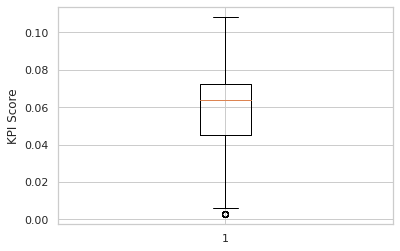

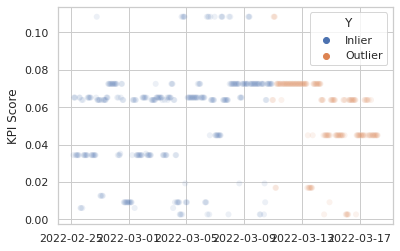

In [67]:
import pandas as pd
import seaborn as sns
display(kpi_scores_inv['INV1'])
y = kpi_scores_inv['INV1']['KPI score']
x = kpi_scores_inv['INV1'].index
classes = df.loc[x, 'Y'].apply(extract_class)

plt.ylabel("KPI Score")
plt.boxplot(y)
plt.show()
#plt.scatter(x, y, alpha = .1)
sns.scatterplot(x = x, y = y, hue = classes, alpha = .1)
plt.ylabel("KPI Score")
plt.show()

# Warnings 

## Definition
1. **Numerical thresholds**;
2. **Derivative**: Consider only KPI scores thaving a degradation behaviour (i.e., negative derivative);
3. **Persistence**: Increase (+1) the *warning level* in case the KPI score persists for more than once timestamp.

## Create the warnings with their relative warning levels [1:4]

In [68]:
inv_warnings = dict()
for inv_name in inv_names:
    print(50 * "-", inv_name, 50 * "-")
    
    # Retrieve potential test observations that should be ignore
    inv_obs_to_ignore = None 
   
    # Retrieve the warnings according to thier KPI scores
    inv_warnings[inv_name] = utils.create_warning(kpi_scores_inv[inv_name], thresholds_inv[inv_name], inv_obs_to_ignore)
    display(inv_warnings[inv_name])
    
    # Save them in a CSV file
    warnings_file_name = f"{inv_name}_warnings.csv"
    if pre_trained:
        warning_subfolder = trained_version[inv_name]
    else:
        warning_subfolder = som_version[inv_name]
    inv_warnings[inv_name].to_csv(path.join(saving_folder_path, saving_warnings_folder_name, warning_subfolder, 
                                            warnings_file_name))
    print(f"The ({len(inv_warnings[inv_name])}) warnings have been saved in a CSV file.\n")

-------------------------------------------------- INV1 --------------------------------------------------

--------------------------------------------------------------------------------
				 Warning levels 
--------------------------------------------------------------------------------
STATEGY: Numerical thresholds (T1: 0.0516, T2: 0.0291) with:
	(A) TIME PERSISTENCE PENALIZATION (>= 2 obs.) 
	(B) KPI scores with a DEGRADATION TREND (i.e., negative derivative)

WARNINGS: 47/507
WARNING DATES (18)
2022-02-25
2022-02-26
2022-02-27
2022-02-28
2022-03-01
2022-03-02
2022-03-03
2022-03-04
2022-03-06
2022-03-07
2022-03-08
2022-03-10
2022-03-11
2022-03-13
2022-03-14
2022-03-15
2022-03-16
2022-03-17
------------------------------ Grouped warning levels ------------------------------


,KPI score
Warning level,
4,2
3,26
1,19


,KPI score,Warning level
2022-02-25 04:00:00,0.034375,1
2022-02-25 08:00:00,0.034375,1
2022-02-25 16:00:00,0.006079,3
2022-02-25 19:00:00,0.006079,3
2022-02-25 21:00:00,0.034375,1
2022-02-26 10:00:00,0.034375,1
2022-02-27 01:00:00,0.012620,3
2022-02-27 04:00:00,0.012620,3
2022-02-28 06:00:00,0.034375,1
2022-02-28 08:00:00,0.034375,1


The (47) warnings have been saved in a CSV file.



## Compute the correct and wrong predictions (TP, TN, FP, FN)

### Create different fault profiles to compute the metrics with different granulairty

In [69]:
prediction_windows = [0, 1]
warning_levels = [4, 3, 2, 1]

### Compute the metrics

In [70]:
warning_metrics = dict()
for inv_name in inv_names:
    
    timestamps = kpi_scores_inv[inv_name].index.tolist()
    warnings = inv_warnings[inv_name]
    
    # Initialize the dictionary
    warning_metrics[inv_name] = []
    
    # Compute the metrics for each fault profile
    for warning_level in warning_levels:
        for prediction_window in prediction_windows:
            print(f"\nPREDICTION WINDOW: - {prediction_window} days || WARNING LEVELS: >= {warning_level}")
            
            # Select the warnings within the warning level selected
            selected_warnings = warnings[warnings["Warning level"] >= warning_level]
            
            # List of failure events
            failure_events_list = outliers['Y'].to_dict()
            #display(failure_events_list)
            
            # Compute the metrics
            config_metrics = utils.compute_correct_wrong_predictions(timestamps, failure_events_list, selected_warnings.index, 
                                                                     prediction_window, verbose = True)
            
            # Save the outcomes
            warning_metrics[inv_name].append({
                    "fault_profile" : "All",
                    "faults": failure_events_list.keys(),
                    "warning_levels": warning_level,
                    "prediction_window": prediction_window,
                    "fault_warnings": selected_warnings.index,
                    "first_warning": selected_warnings.index[0] if len(selected_warnings) > 0 else [],
                    "metrics": list(zip(['TP', 'TN', 'FP', 'FN'], config_metrics)),
                })

    all_metrics = pd.DataFrame(warning_metrics[inv_name])
    print(50 * "-" +  f" {inv_name}: METRICS " + 50 * "-")
    display(all_metrics)
    print(80 * "-")        


PREDICTION WINDOW: - 0 days || WARNING LEVELS: >= 4

TIMESTAMP (507) [Timestamp('2022-02-25 04:00:00'), Timestamp('2022-02-25 05:00:00'), Timestamp('2022-02-25 06:00:00'), Timestamp('2022-02-25 07:00:00'), Timestamp('2022-02-25 08:00:00'), Timestamp('2022-02-25 09:00:00'), Timestamp('2022-02-25 10:00:00'), Timestamp('2022-02-25 11:00:00'), Timestamp('2022-02-25 12:00:00'), Timestamp('2022-02-25 13:00:00')] ...

FAULT EVENTS (176) ['2022-03-10 23:00:00', '2022-03-11 00:00:00', '2022-03-11 01:00:00', '2022-03-11 02:00:00', '2022-03-11 03:00:00', '2022-03-11 04:00:00', '2022-03-11 05:00:00', '2022-03-11 06:00:00', '2022-03-11 07:00:00', '2022-03-11 08:00:00'] ...

WARNINGS (2) [Timestamp('2022-03-04 23:00:00'), Timestamp('2022-03-14 13:00:00')] ...


--------------------------------------------------
Computing the correct and wrong predictions 
--------------------------------------------------
START: 2022-03-10 23:00:00 END: 2022-03-10 23:00:00
START: 2022-03-11 00:00:00 END: 2022-03-11

,fault_profile,faults,warning_levels,prediction_window,fault_warnings,first_warning,metrics
0,All,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",4,0,"DatetimeIndex(['2022-03-04 23:00:00', '2022-03...",2022-03-04 23:00:00,"[(TP, 1), (TN, 330), (FP, 1), (FN, 175)]"
1,All,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",4,1,"DatetimeIndex(['2022-03-04 23:00:00', '2022-03...",2022-03-04 23:00:00,"[(TP, 25), (TN, 306), (FP, 1), (FN, 151)]"
2,All,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",3,0,"DatetimeIndex(['2022-02-25 16:00:00', '2022-02...",2022-02-25 16:00:00,"[(TP, 7), (TN, 310), (FP, 21), (FN, 169)]"
3,All,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",3,1,"DatetimeIndex(['2022-02-25 16:00:00', '2022-02...",2022-02-25 16:00:00,"[(TP, 133), (TN, 289), (FP, 18), (FN, 43)]"
4,All,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",2,0,"DatetimeIndex(['2022-02-25 16:00:00', '2022-02...",2022-02-25 16:00:00,"[(TP, 7), (TN, 310), (FP, 21), (FN, 169)]"
5,All,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",2,1,"DatetimeIndex(['2022-02-25 16:00:00', '2022-02...",2022-02-25 16:00:00,"[(TP, 133), (TN, 289), (FP, 18), (FN, 43)]"
6,All,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",1,0,"DatetimeIndex(['2022-02-25 04:00:00', '2022-02...",2022-02-25 04:00:00,"[(TP, 14), (TN, 298), (FP, 33), (FN, 162)]"
7,All,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",1,1,"DatetimeIndex(['2022-02-25 04:00:00', '2022-02...",2022-02-25 04:00:00,"[(TP, 148), (TN, 277), (FP, 30), (FN, 28)]"


--------------------------------------------------------------------------------


## Compute the overall metrics
1. ** F1-Score**
2. **Recall/Hit rate** (correct positive prevision / Retrieve true positive cases)
3. **Miss Rate** (a.k.a., FNR: False Negative Rate = FN/TP+FN)
4. **Fall-out** (a.k.a., FPR: False Positive Rate = FP/TN + FP)

In [71]:
pre_trained = False # ONLY FOR TESTING MIX PRETRAINED SOM

In [72]:
for inv_name in inv_names:
    print("\n" + 120 * "-" + f"\n\t\t\t\t\t{inv_name}: Analysis of its warning and fault events\n" + 120 * "-")
    
    all_metrics = warning_metrics[inv_name]
    
    # Compute the metrics for each configuration
    performances = []
    for idk, config in enumerate(all_metrics):
        print(40 * "-" + f" CONFIGURATION {idk + 1}/{len(all_metrics)} " + 30 * "-" )
        print(f"WARNING LEVELS: <= {config['warning_levels']}\nPREDICTION WINDOW: - {config['prediction_window']} day(s)")
        print(f"FAULT PROFILE: {config['fault_profile']}\n"+ 80 * "-")
        print(80 * "-")
        
        # Retrieve the values of TP, TN, FP, FN
        config_metrics = [value for name, value in config["metrics"]]
        true_positive, true_negative, false_positive, false_negative = config_metrics
        
        # Compute the metrics (i.e., recall, ...)
        recall, miss_rate, fall_out, precision, f1_score = utils.compute_metrics(true_positive, false_positive, 
                                                                                 false_negative, true_negative, 
                                                                                 verbose = True)
        # Create a Pandas Series for this metrics
        data = (config["fault_profile"], len(config['faults']), config['faults'], 
                config['warning_levels'], config['prediction_window'], 
                config["first_warning"], config["fault_warnings"],
                f1_score, recall, miss_rate, fall_out, precision)
        
        column_names = ["Fault Profile", "Num Faults", "Faults", "Warning levels (>=)" , "Prediction Window (days)",
                        "First Fault Warning", "Fault warnings", 
                        "F1 score", "Recall", "Miss rate", "Fall out", "Precision"]
        performances.append(pd.Series(data, index = column_names))
     
    # Create a Pandas Dataframe for the performance of all the fault profiles
    metrics_df = pd.DataFrame(performances)
    print("\n"+ "-"*40 + f" SOM PERFORMANCE: {inv_name} " + 40 * "-")
    display(metrics_df)
    
    # Save the metrics
    if pre_trained:
        subfolder = trained_version[inv_name] + pretrained_config_params
    else:
        subfolder = som_version[inv_name]
        
    file_name = f"{inv_name}_performance.csv"
    file_path = path.join(saving_folder_path, saving_metrics_folder_name, subfolder)
    metrics_df.to_csv(path.join(file_path, file_name))
    print(f"The perfomances for all the combinations (i.e., fault profiles, warning levels, time windows) "\
          f"\nhave been saved in '{saving_metrics_folder_name}/{subfolder}'")


------------------------------------------------------------------------------------------------------------------------
					INV1: Analysis of its warning and fault events
------------------------------------------------------------------------------------------------------------------------
---------------------------------------- CONFIGURATION 1/8 ------------------------------
WARNING LEVELS: <= 4
PREDICTION WINDOW: - 0 day(s)
FAULT PROFILE: All
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

---------------------- METRICS ----------------------
TP:  1  TN:  330
FP:  1  FN:  175 

a) RECALL/HIT RATE          (TP/TP+FN): 0.57 %
b) MISS RATE (1 - Hit Rate) (FN/FN+TP): 99.43 %
c) PRECISION                (TP/TP+FP): 50.0 %
d) FALL-OUT (FP Rate)       (FP/FP+TN): 0.3 %
e) F1 SCORE                           : 1.12 %
----------------------------------------------------
Delt

,Fault Profile,Num Faults,Faults,Warning levels (>=),Prediction Window (days),First Fault Warning,Fault warnings,F1 score,Recall,Miss rate,Fall out,Precision
0,All,176,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",4,0,2022-03-04 23:00:00,"DatetimeIndex(['2022-03-04 23:00:00', '2022-03...",0.011236,0.005682,0.994318,0.003021,0.500000
1,All,176,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",4,1,2022-03-04 23:00:00,"DatetimeIndex(['2022-03-04 23:00:00', '2022-03...",0.247525,0.142045,0.857955,0.003257,0.961538
2,All,176,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",3,0,2022-02-25 16:00:00,"DatetimeIndex(['2022-02-25 16:00:00', '2022-02...",0.068627,0.039773,0.960227,0.063444,0.250000
3,All,176,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",3,1,2022-02-25 16:00:00,"DatetimeIndex(['2022-02-25 16:00:00', '2022-02...",0.813456,0.755682,0.244318,0.058632,0.880795
4,All,176,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",2,0,2022-02-25 16:00:00,"DatetimeIndex(['2022-02-25 16:00:00', '2022-02...",0.068627,0.039773,0.960227,0.063444,0.250000
5,All,176,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",2,1,2022-02-25 16:00:00,"DatetimeIndex(['2022-02-25 16:00:00', '2022-02...",0.813456,0.755682,0.244318,0.058632,0.880795
6,All,176,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",1,0,2022-02-25 04:00:00,"DatetimeIndex(['2022-02-25 04:00:00', '2022-02...",0.125561,0.079545,0.920455,0.099698,0.297872
7,All,176,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",1,1,2022-02-25 04:00:00,"DatetimeIndex(['2022-02-25 04:00:00', '2022-02...",0.836158,0.840909,0.159091,0.097720,0.831461


The perfomances for all the combinations (i.e., fault profiles, warning levels, time windows) 
have been saved in 'Metrics/4grid_4Kepoch_0.001lr_1sigma_gaussianFunc_'


In [82]:
cond_warning = metrics_df['Warning levels (>=)'].isin([1, 3])
cond_days = metrics_df['Prediction Window (days)'] == 0

display(metrics_df[cond_days & cond_warning])

# PRECISON: 0.951 (95.1 %)
# RECALL: 0.938 (93.8%)
# F1-SCORE: 0.805 (80.5%)

,Fault Profile,Num Faults,Faults,Warning levels (>=),Prediction Window (days),First Fault Warning,Fault warnings,F1 score,Recall,Miss rate,Fall out,Precision
2,All,176,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",3,0,2022-02-25 16:00:00,"DatetimeIndex(['2022-02-25 16:00:00', '2022-02...",0.068627,0.039773,0.960227,0.063444,0.250000
6,All,176,"(2022-03-10 23:00:00, 2022-03-11 00:00:00, 202...",1,0,2022-02-25 04:00:00,"DatetimeIndex(['2022-02-25 04:00:00', '2022-02...",0.125561,0.079545,0.920455,0.099698,0.297872
